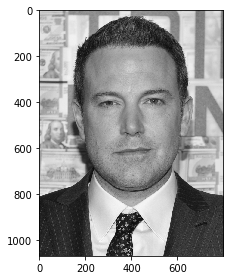

In [ ]:
import skimage 
from skimage import io 
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import filters

sigma = 0.5 # use different values
faceIm = io.imread("affleck_gray.png").astype('float64')
# ‘truncate’ builds filter to 3*sigma size
gIm = filters.gaussian(faceIm, sigma=sigma, truncate=3) 
io.imshow(gIm/255) ## float images need range of 0-1 plt.axis("image")

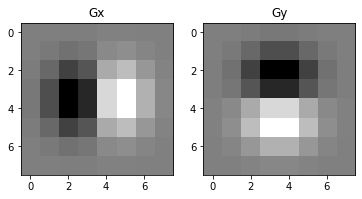

In [ ]:
def gaussianDeriv2D(sigma):

    x, y = np.meshgrid(np.linspace(-3*sigma, 3*sigma,8), np.linspace(-3*sigma, 3*sigma,8))

    Gx = x * np.exp(-(x**2 + y**2) / (2*sigma**2)) / (2 * np.pi * sigma**4)
    Gy = y * np.exp(-(x**2 + y**2) / (2*sigma**2)) / (2 * np.pi * sigma**4)
    return Gx,Gy;

Gx,Gy = gaussianDeriv2D(10)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(Gx, cmap='gray')
plt.title('Gx')
plt.subplot(1, 2, 2)
plt.imshow(Gy, cmap='gray')
plt.title('Gy')
plt.show()




/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


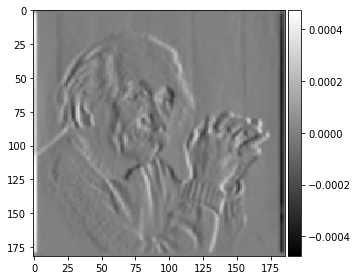

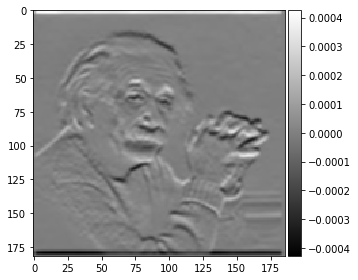

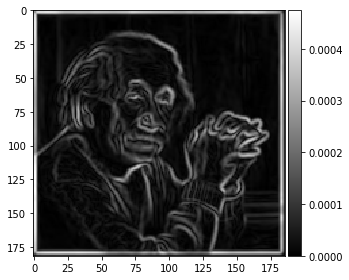

In [ ]:
import scipy

Im = io.imread("Im.png")
Im = io.imread("Im.png", as_gray=True)

gxIm = scipy.ndimage.convolve(Im, Gx, mode='nearest')
gyIm = scipy.ndimage.convolve(Im, Gy, mode='nearest')
magIm = np.sqrt(gxIm**2 + gyIm**2)
plt.figure()
io.imshow(gxIm, cmap='gray')
plt.figure()
io.imshow(gyIm, cmap='gray')
plt.figure()
io.imshow(magIm, cmap='gray')
plt.show()


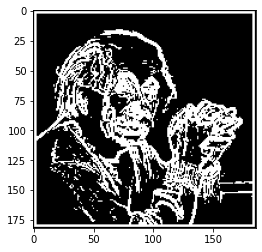

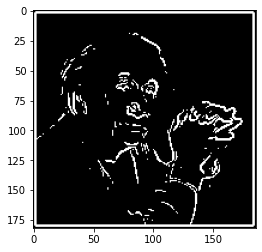

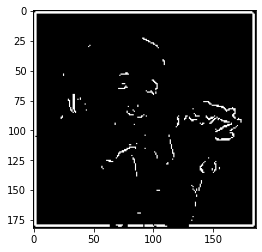

In [ ]:
threshold_array = [0.1, 0.3, 0.43]
max = np.max(magIm)
min = np.min(magIm)
for T in threshold_array:
  tIm = magIm > T
  plt.figure()
  plt.imshow(tIm, cmap='gray')

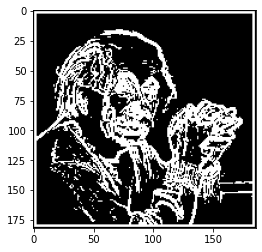

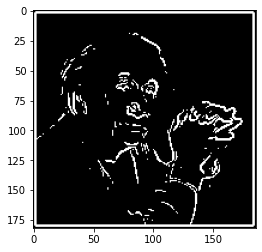

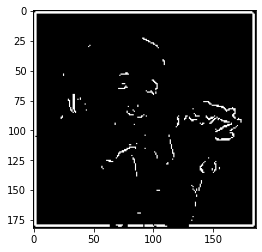

In [ ]:
fxIm = filters.sobel_h(Im)
fyIm = filters.sobel_v(Im)
magIm = np.sqrt(fxIm**2 + fyIm**2)
for T in threshold_array:
  tIm = magIm > T
  plt.figure() ; plt.imshow(tIm, cmap='gray')


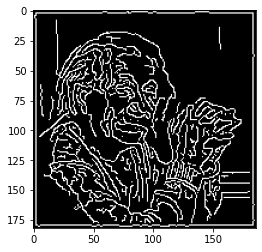

In [ ]:
from skimage import feature
cannyIm = feature.canny(Im, sigma=1)
plt.figure() ; plt.imshow(cannyIm, cmap='gray')
